# <font color='blue'>Como Analisar o Comportamento de Compra de Consumidores.</font>


## Compras de um Web Site

O nosso objetivo será analisar os dados de compras de um site! Os dados estão no formato JSON.

No site, cada usuário efetua login usando sua conta pessoal e pode adquirir produtos à medida que navega pela lista de produtos oferecidos. Cada produto possui um valor de venda. Dados de idade e sexo de cada usuário foram coletados e estão fornecidos neste arquivo JSON.

O objetivo é entregar uma análise de comportamento de compra dos consumidores. Esse é um tipo de atividade comum realizado por Cientistas de Dados e o resultado deste trabalho pode ser usado, por exemplo, para alimentar um modelo de Machine Learning e fazer previsões sobre comportamentos futuros.

Iremos analisar o comportamento de compra dos consumidores utilizando o pacote Pandas do Python contendo a resposta para os seguintes itens:

**Contagem de Compradores**

* Número total de compradores


**Análise Geral de Compras**

* Número de itens exclusivos
* Preço médio de compra
* Número total de compras
* Rendimento total


**Informações Demográficas Por Gênero**

* Porcentagem e contagem de compradores masculinos
* Porcentagem e contagem de compradores do sexo feminino
* Porcentagem e contagem de outros / não divulgados


**Análise de Compras Por Gênero**

* Número de compras
* Preço médio de compra
* Valor Total de Compra

**Compras por Faixa Etária**

- Contagem
- %
- preço médio de compras
- Valor Total de compras



**Identifique os 5 principais compradores pelo valor total de compra e, em seguida, liste (em uma tabela):**

* Login
* Número de compras
* Preço médio de compra
* Valor Total de Compra



**Identifique os 5 itens mais populares por contagem de compras e, em seguida, liste (em uma tabela):**

* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra
* Itens mais lucrativos


**Identifique os 5 itens mais lucrativos pelo valor total de compra e, em seguida, liste (em uma tabela):**

* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra

In [238]:
# Importando as bibliotecas para análise

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [239]:
# Carregando o arquivo
base_compras = pd.read_json('https://docs.google.com/uc?export=download&id=1OaUZkbS0FqpqeUiiz-yx28O6dIqWwZBH', orient = "records")
base_compras.head(10)

,Login,Idade,Sexo,Item ID,Nome do Item,Valor
0,Aelalis34,38,Masculino,164,Bone Crushing Silver Skewer,3.37
1,Eolo46,21,Masculino,119,"Stormbringer, Dark Blade of Ending Misery",2.32
2,Assastnya25,34,Masculino,174,Primitive Blade,2.46
3,Pheusrical25,21,Masculino,92,Final Critic,1.36
4,Aela59,23,Masculino,63,Stormfury Mace,1.27
5,Tanimnya91,20,Masculino,10,Sleepwalker,1.73
6,Undjaskla97,20,Masculino,153,Mercenary Sabre,4.57
7,Iathenudil29,29,Feminino,169,"Interrogator, Blood Blade of the Queen",3.32
8,Sondenasta63,25,Masculino,118,"Ghost Reaver, Longsword of Magic",2.77
9,Hilaerin92,31,Masculino,99,"Expiration, Warscythe Of Lost Worlds",4.53



### <font color=" purple"> Contagem de Compradores </font>

* Número total de compradores

***
*Sabemos que os valores de compras possuem duplicadas, pois afinal, um cliente pode comprar mais de uma vez*

In [240]:
# pegandos apenas informações dos clientes
clientes = base_compras.loc[:, ["Login", "Idade", "Sexo"]]
clientes.head()

,Login,Idade,Sexo
0,Aelalis34,38,Masculino
1,Eolo46,21,Masculino
2,Assastnya25,34,Masculino
3,Pheusrical25,21,Masculino
4,Aela59,23,Masculino


In [241]:
# Pegando apenas valores únicos dos clientes
clientes = clientes.drop_duplicates()
total_clientes = clientes.count()[0]
total_clientes

573

In [242]:
total_clientes_df = pd.DataFrame({"Total de Clientes": [total_clientes]})
total_clientes_df

,Total de Clientes
0,573


* Número total de compradores
    * <font color="red"> 573 </font>

###  <font color = "purple" > Análise Geral de Compras </font>

* Número de itens exclusivos
* Preço médio de compra
* Número total de compras
* Rendimento total


In [243]:
# Cálculos básicos

# Número de itens exclusivos
itens_exclusivos = len(base_compras['Item ID'].unique())
# Preço médio de compra 
preco_medio_compras = base_compras["Valor"].mean()
# Número total de compra
total_compras = base_compras['Valor'].count()
# Rendimento total
rendimento_total = base_compras["Valor"].sum()

# DataFrame para os resultados
Analise_Geral_Compras_df = pd.DataFrame({"Número de itens Únicos": [itens_exclusivos],
                                     "Preço Médio": [preco_medio_compras],
                                     "Número de Compras": [total_compras],
                                     "Rendimento Total": [rendimento_total]})


# Manipulação de dados
Analise_Geral_Compras_df = Analise_Geral_Compras_df.round(2)
Analise_Geral_Compras_df["Preço Médio"] = Analise_Geral_Compras_df["Preço Médio"].map("${:,.2f}".format)
Analise_Geral_Compras_df["Rendimento Total"] = Analise_Geral_Compras_df["Rendimento Total"].map("${:,.2f}".format)


In [244]:
itens_exclusivos, preco_medio_compras, total_compras, rendimento_total

(183, 2.931192307692303, 780, 2286.33)

In [245]:
# Visualizando o DataFrame de Analise Geral de Compras
Analise_Geral_Compras_df

,Número de itens Únicos,Preço Médio,Número de Compras,Rendimento Total
0,183,$2.93,780,"$2,286.33"


- Número de itens exclusivos
    - <font color="lilac"> 183 </font>
- Preço médio de compra
    - <font color="lilac"> 2.93 </font>

- Número total de compras
    - <font color="lilac"> 780 </font>
- Rendimento total
    - <font color="lilac"> 2,286.33 </font>


### <font color="purple"> Informações Demográficas Por Gênero </font>

* Porcentagem e contagem de compradores masculinos
* Porcentagem e contagem de compradores do sexo feminino
* Porcentagem e contagem de outros / não divulgados


In [246]:
contagen_sexo = clientes.Sexo.value_counts()
porcentagen_sexo = (contagen_sexo / total_clientes) * 100

# DataFrame para os resultados
genero_df = pd.DataFrame({"Sexo": contagen_sexo,
                          "%": porcentagen_sexo},)

genero_df = genero_df.round(2)

In [247]:
# Exibindo contagem de gêneros
contagen_sexo

Masculino                465
Feminino                 100
Outro / Não Divulgado      8
Name: Sexo, dtype: int64

In [248]:
# exibindo Porcentagem de gêneros
porcentagen_sexo

Masculino                81.151832
Feminino                 17.452007
Outro / Não Divulgado     1.396161
Name: Sexo, dtype: float64

In [249]:
genero_df

,Sexo,%
Masculino,465,81.15
Feminino,100,17.45
Outro / Não Divulgado,8,1.40


- **Masculino**................................. <font color="blue"> 465 / *81.15%* </font>
- **Feminino**................................... <font color="violet"> 100 / *17.45%* </font>
- **Outro / Não Divulgado**............. <font color="gray"> 8 / *1.40%* </font>

### <font color="purple">Análise de Compras Por Gênero </font>



* Número de compras
* Preço médio de compra
* Valor Total de Compra



In [250]:
# Número de compras por gênero
compras_genero = base_compras.groupby(['Sexo']).count()["Valor"].rename("NCompras_genero")
# Preço médio de compra por gênero
preco_medio_compra_genero = base_compras.groupby(["Sexo"]).mean()["Valor"].rename("Media_Compras_genero")
# Valor Total de Compra por gênero
total_compra_genero = base_compras.groupby(["Sexo"]).sum()["Valor"].rename("Valor Total Compras")
# Porcentagem de compras por Gênero
porcentagen_compras_genero = (compras_genero / total_compras) * 100
# total normalizado 
normalizado = total_compra_genero / clientes.Sexo.value_counts()  # Ou poderia dividir por "genero_df.Sexo" (total_compra_genero / genero_df.Sexo)

# DataFrame para os resultados
AnaliseComprasGenero_df = pd.DataFrame({"Num. Compras": compras_genero,
                                     "%": porcentagen_compras_genero,
                                   "Média de compras": preco_medio_compra_genero,
                                   "Valor Total de Compras": total_compra_genero,
                                    "Total Normalizado": normalizado})

AnaliseComprasGenero_df = AnaliseComprasGenero_df.round(2)

AnaliseComprasGenero_df["Média de compras"] = AnaliseComprasGenero_df["Média de compras"].map("${:,.2f}".format)
AnaliseComprasGenero_df["Valor Total de Compras"] = AnaliseComprasGenero_df["Valor Total de Compras"].map("${:,.2f}".format)
AnaliseComprasGenero_df["Total Normalizado"] = AnaliseComprasGenero_df["Total Normalizado"].map("${:,.2f}".format)
AnaliseComprasGenero_df["%"] = AnaliseComprasGenero_df["%"].map("{:,.1f}%".format)

In [251]:
# Exibindo as compras por Gênero
compras_genero

Sexo
Feminino                 136
Masculino                633
Outro / Não Divulgado     11
Name: NCompras_genero, dtype: int64

In [252]:
# Exibindo a média de compra por Gênero
preco_medio_compra_genero

Sexo
Feminino                 2.815515
Masculino                2.950521
Outro / Não Divulgado    3.249091
Name: Media_Compras_genero, dtype: float64

In [253]:
# Exibindo o total compras por Gênero
total_compra_genero

Sexo
Feminino                  382.91
Masculino                1867.68
Outro / Não Divulgado      35.74
Name: Valor Total Compras, dtype: float64

In [254]:
# Exibindo o DF de Análise de Compras por Gênero
AnaliseComprasGenero_df

,Num. Compras,%,Média de compras,Valor Total de Compras,Total Normalizado
Feminino,136,17.4%,$2.82,$382.91,$3.83
Masculino,633,81.2%,$2.95,"$1,867.68",$4.02
Outro / Não Divulgado,11,1.4%,$3.25,$35.74,$4.47


### <font color ="purple"> Compras por Faixa Etária </font>

- Contagem
- %
- preço médio de compras
- Valor Total de compras


In [255]:
# Cálculos básicos
idade_bins = [0, 9.99, 14.99, 19.99, 24.99, 29.99, 34.99, 39.99, 999]
idade_categoria = ["Menos de 10", "10 a 14", "15 a 19", "20 a 24", "25 a 29", "30 a 34", "35 a 39", "Mais de 40"]

faixa_etaria = base_compras.copy()
faixa_etaria["Range de Idade"] = pd.cut(faixa_etaria["Idade"], idade_bins, labels=idade_categoria)

# Contagem de clientes por faixa etária
contagem = faixa_etaria.groupby(["Range de Idade"]).count()['Valor']  # poderia ser value_counts()
# Porcentagem de clientes por faixa etária
porcentagem_faixa_etaria = contagem / total_clientes * 100
# preço médio de compras por faixa etária
preco_medio_faixa_etaria = faixa_etaria.groupby(["Range de Idade"]).mean()["Valor"]
# Valor Total de compras por faixa etária
valor_total_faixa_etaria = faixa_etaria.groupby(["Range de Idade"]).sum()["Valor"]

# DataFrame dos resultados
Idades_df = pd.DataFrame({"Contagem": contagem,
                      "%": porcentagem_faixa_etaria,
                      "Preço médio de compras": preco_medio_faixa_etaria,
                      "Valor Total de compras": valor_total_faixa_etaria})

# Manipulação de Dados
Idades_df = Idades_df.round(2)
Idades_df["Preço médio de compras"] = Idades_df["Preço médio de compras"].map("${:,.2f}".format)
Idades_df["Valor Total de compras"] = Idades_df["Valor Total de compras"].map("${:,.2f}".format)
Idades_df["%"] = Idades_df["%"].map("{:,.1f}%".format)

In [256]:
# Contagem de cliente por faixa etária
contagem, total_clientes

(Range de Idade
 Menos de 10     28
 10 a 14         35
 15 a 19        133
 20 a 24        336
 25 a 29        125
 30 a 34         64
 35 a 39         42
 Mais de 40      17
 Name: Valor, dtype: int64,
 573)

In [257]:
# Porcentagem de clientes por faixa etária
porcentagem_faixa_etaria

Range de Idade
Menos de 10     4.886562
10 a 14         6.108202
15 a 19        23.211169
20 a 24        58.638743
25 a 29        21.815009
30 a 34        11.169284
35 a 39         7.329843
Mais de 40      2.966841
Name: Valor, dtype: float64

In [258]:
# Preço médio de clintes por faixa etária
preco_medio_faixa_etaria

Range de Idade
Menos de 10    2.980714
10 a 14        2.770000
15 a 19        2.905414
20 a 24        2.913006
25 a 29        2.962640
30 a 34        3.082031
35 a 39        2.842857
Mais de 40     3.161765
Name: Valor, dtype: float64

In [259]:
# Valor Total de compras por faixa etária
valor_total_faixa_etaria

Range de Idade
Menos de 10     83.46
10 a 14         96.95
15 a 19        386.42
20 a 24        978.77
25 a 29        370.33
30 a 34        197.25
35 a 39        119.40
Mais de 40      53.75
Name: Valor, dtype: float64

In [260]:
#Exibindo o DataFrame de faixa etária
Idades_df

,Contagem,%,Preço médio de compras,Valor Total de compras
Range de Idade,,,,
Menos de 10,28,4.9%,$2.98,$83.46
10 a 14,35,6.1%,$2.77,$96.95
15 a 19,133,23.2%,$2.91,$386.42
20 a 24,336,58.6%,$2.91,$978.77
25 a 29,125,21.8%,$2.96,$370.33
30 a 34,64,11.2%,$3.08,$197.25
35 a 39,42,7.3%,$2.84,$119.40
Mais de 40,17,3.0%,$3.16,$53.75


#### <font color="blue"> Acima foram respodidas as seguintes perguntas: </font>
- <font color="gray"> ***Compras por Faixa Etária*** </font>
    - Contagem
    - %
    - preço médio de compras
    - Valor Total de compras


### <font color="purple"> Identifique os 5 principais compradores pelo valor total de compra e, em seguida, liste (em uma tabela):  </font>

* Login
* Número de compras
* Preço médio de compra
* Valor Total de Compra


In [261]:
# Número de compras por cliente
num_compras = base_compras.groupby(["Login"]).count()["Nome do Item"]
# preço Médio de compras por cliente
p_medio_compradores = base_compras.groupby(["Login"]).mean()["Valor"] 
# Valor Total de compras por cliente
v_total_compradores = base_compras.groupby(["Login"]).sum()["Valor"]

# DataFrame dos resultados 
principais_compradores_df = pd.DataFrame({"Numero de compras": num_compras,
                                      "Média de compras": p_medio_compradores,
                                      "Valor Total": v_total_compradores})

# Manipulação dos dados
principais_compradores_df = principais_compradores_df.round(2)
principais_compradores_df["Média de compras"] = principais_compradores_df["Média de compras"].map("${:,.2f}".format)





In [262]:
# Número de compras por cliente
num_compras.sort_values(ascending=False)

Login
Undirrala66    5
Mindimnya67    4
Qarwen67       4
Saedue76       4
Sondastan54    4
              ..
Ilaesudil92    1
Iduedru67      1
Idaria87       1
Idairin80      1
Zontibe81      1
Name: Nome do Item, Length: 573, dtype: int64

In [263]:
## Preço médio de compras por cliente
p_medio_compradores

Login
Adairialis76    2.460000
Aduephos78      2.233333
Aeduera68       1.933333
Aela49          2.460000
Aela59          1.270000
                  ...   
Yasurra52       3.140000
Yathecal72      3.885000
Yathecal82      2.410000
Zhisrisu83      1.230000
Zontibe81       3.710000
Name: Valor, Length: 573, dtype: float64

In [264]:
# Separando a base "principais_compradores" em duas outras bases, uma com os que MAIS COMPRARAM
## e a outra com os que MAIS GASTARAM.

principais_compradores1_df = principais_compradores_df.sort_values(by="Numero de compras", ascending=False)  #Ordenando
principais_compradores2_df = principais_compradores_df.sort_values(by="Valor Total", ascending=False)       #Ordenando

In [265]:
# Manipulação de dados
# Só depois de ordenarmos pela variável "Valor Total" é que podemos trasnformála em 'object' (colocando $)

principais_compradores2_df["Valor Total"] = principais_compradores2_df["Valor Total"].map("${:,.2f}".format)
principais_compradores1_df["Valor Total"] = principais_compradores1_df["Valor Total"].map("${:,.2f}".format)


In [266]:
# Base dos clientes que mais COMPRARAM (ordenada pelo "Numero de compras")
principais_compradores1_df.head(5)

,Numero de compras,Média de compras,Valor Total
Login,,,
Undirrala66,5,$3.41,$17.06
Mindimnya67,4,$3.18,$12.74
Qarwen67,4,$2.49,$9.97
Saedue76,4,$3.39,$13.56
Sondastan54,4,$2.56,$10.24


In [267]:
# Base dos clientes que mais GASTARAM (ordenada pelo "Valor Total")
principais_compradores2_df.head(5)

,Numero de compras,Média de compras,Valor Total
Login,,,
Undirrala66,5,$3.41,$17.06
Saedue76,4,$3.39,$13.56
Mindimnya67,4,$3.18,$12.74
Haellysu29,3,$4.24,$12.73
Eoda93,3,$3.86,$11.58


#### <font color="blue"> Acima foram respodidas as seguintes perguntas: </font>

- <font color="gray"> ***Identifique os 5 principais compradores pelo valor total de compra e, em seguida, liste (em uma tabela):*** </font>
    * Login
    * Número de compras
    * Preço médio de compra
    * Valor Total de Compra


### <font color="purple" > Identifique os 5 itens mais populares por contagem de compras e, em seguida, liste (em uma tabela):** </font>

* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra





In [268]:
# Número de compras por item
num_compras_item = base_compras.groupby(["Nome do Item"]).count()["Valor"]
# média de valor dos itens
media_item = base_compras.groupby(["Nome do Item"]).mean()["Valor"]
# valor total de venda dos itens
valor_total_item = base_compras.groupby(["Nome do Item"]).sum()["Valor"]

# Dataframe para os resultados
top_itens_df = pd.DataFrame({"Numero de itens": num_compras_item,
                         "Preço médio do item": media_item,
                         "Valor total item": valor_total_item})

# Manipulação de dados
top_itens_df = top_itens_df.round(2)
top_itens_df["Preço médio do item"] = top_itens_df["Preço médio do item"].map("${:,.2f}".format)
top_itens_df["Valor total item"] = top_itens_df["Valor total item"].map("${:,.2f}".format)

# Ordenando peo número de itens vendidos
top_itens_df = top_itens_df.sort_values(by="Numero de itens", ascending=False)

In [269]:
# Exibindo Número de compras por item
num_compras_item

Nome do Item
Abyssal Shard                      3
Aetherius, Boon of the Blessed     4
Agatha                             5
Alpha                              7
Alpha, Oath of Zeal                7
                                  ..
Wolf                               5
Wolf, Promise of the Moonwalker    7
Worldbreaker                       2
Yearning Crusher                   2
Yearning Mageblade                 4
Name: Valor, Length: 179, dtype: int64

In [270]:
# Exibindo média de valor dos itens
media_item

Nome do Item
Abyssal Shard                      2.04
Aetherius, Boon of the Blessed     4.75
Agatha                             1.91
Alpha                              1.56
Alpha, Oath of Zeal                2.88
                                   ... 
Wolf                               1.84
Wolf, Promise of the Moonwalker    1.88
Worldbreaker                       3.29
Yearning Crusher                   1.06
Yearning Mageblade                 1.79
Name: Valor, Length: 179, dtype: float64

In [271]:
# Exibindo Valor total de vendas dos itens
valor_total_item

Nome do Item
Abyssal Shard                       6.12
Aetherius, Boon of the Blessed     19.00
Agatha                              9.55
Alpha                              10.92
Alpha, Oath of Zeal                20.16
                                   ...  
Wolf                                9.20
Wolf, Promise of the Moonwalker    13.16
Worldbreaker                        6.58
Yearning Crusher                    2.12
Yearning Mageblade                  7.16
Name: Valor, Length: 179, dtype: float64

In [272]:
## Top itens mais populares / mais vendidos
top_itens_df.head(5)

,Numero de itens,Preço médio do item,Valor total item
Nome do Item,,,
Final Critic,14,$2.76,$38.60
Arcane Gem,11,$2.23,$24.53
"Betrayal, Whisper of Grieving Widows",11,$2.35,$25.85
Stormcaller,10,$3.47,$34.65
Woeful Adamantite Claymore,9,$1.24,$11.16


#### <font color="blue"> Acima foram respodidas as seguintes perguntas: </font>

- <font color="gray"> ***Identifique os 5 itens mais populares por contagem de compras e, em seguida, liste (em uma tabela):*** </font>
    * ID do item
    * Nome do item
    * Número de compras
    * Preço do item
    * Valor Total de Compra


### <font color="purple">Identifique os 5 itens mais lucrativos pelo valor total de compra e, em seguida, liste (em uma tabela):</font>

* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra

In [273]:
# Número de itens
N_itens_lucrativos = base_compras.groupby("Nome do Item").count()["Valor"]
# Preço médio de cada item
p_medio_itens_lucrativos = base_compras.groupby("Nome do Item").mean()["Valor"]
# Preço mediano de cada item
p_mediano_itens_lucrativos = base_compras.groupby("Nome do Item").median()["Valor"]
# Valor total das vendas de cada item
valor_total_itens_lucrativos = base_compras.groupby("Nome do Item").sum()["Valor"]

# DataFrame para os resultados
top_lucrativos_df = pd.DataFrame({"Num. de itens": N_itens_lucrativos,
                              "Preço médio": p_medio_itens_lucrativos,
                              "Preço mediano": p_mediano_itens_lucrativos,
                              "Valor Total": valor_total_itens_lucrativos})

## Ordenando pelo "Valor"
top_lucrativos_df = top_lucrativos_df.sort_values(by="Valor Total", ascending=False)
display(top_lucrativos_df.head())

# Manipulação de dados
top_lucrativos_df = top_lucrativos_df.round(2)
top_lucrativos_df["Preço médio"] = top_lucrativos_df["Preço médio"].map("${:,.2f}".format)
top_lucrativos_df["Preço mediano"] = top_lucrativos_df["Preço mediano"].map("${:,.2f}".format)
top_lucrativos_df["Valor Total"] = top_lucrativos_df["Valor Total"].map("${:,.2f}".format)


,Num. de itens,Preço médio,Preço mediano,Valor Total
Nome do Item,,,,
Final Critic,14,2.757143,1.360,38.60
Retribution Axe,9,4.140000,4.140,37.26
Stormcaller,10,3.465000,3.465,34.65
Spectral Diamond Doomblade,7,4.250000,4.250,29.75
Orenmir,6,4.950000,4.950,29.70


In [274]:
# Número de itens
N_itens_lucrativos

Nome do Item
Abyssal Shard                      3
Aetherius, Boon of the Blessed     4
Agatha                             5
Alpha                              7
Alpha, Oath of Zeal                7
                                  ..
Wolf                               5
Wolf, Promise of the Moonwalker    7
Worldbreaker                       2
Yearning Crusher                   2
Yearning Mageblade                 4
Name: Valor, Length: 179, dtype: int64

In [275]:
# Preço médio de cada item
p_medio_itens_lucrativos

Nome do Item
Abyssal Shard                      2.04
Aetherius, Boon of the Blessed     4.75
Agatha                             1.91
Alpha                              1.56
Alpha, Oath of Zeal                2.88
                                   ... 
Wolf                               1.84
Wolf, Promise of the Moonwalker    1.88
Worldbreaker                       3.29
Yearning Crusher                   1.06
Yearning Mageblade                 1.79
Name: Valor, Length: 179, dtype: float64

In [276]:
# Preço mediano de cada item
p_mediano_itens_lucrativos

Nome do Item
Abyssal Shard                      2.04
Aetherius, Boon of the Blessed     4.75
Agatha                             1.91
Alpha                              1.56
Alpha, Oath of Zeal                2.88
                                   ... 
Wolf                               1.84
Wolf, Promise of the Moonwalker    1.88
Worldbreaker                       3.29
Yearning Crusher                   1.06
Yearning Mageblade                 1.79
Name: Valor, Length: 179, dtype: float64

In [277]:
# Valor total das vendas de cada item
valor_total_itens_lucrativos 

Nome do Item
Abyssal Shard                       6.12
Aetherius, Boon of the Blessed     19.00
Agatha                              9.55
Alpha                              10.92
Alpha, Oath of Zeal                20.16
                                   ...  
Wolf                                9.20
Wolf, Promise of the Moonwalker    13.16
Worldbreaker                        6.58
Yearning Crusher                    2.12
Yearning Mageblade                  7.16
Name: Valor, Length: 179, dtype: float64

In [278]:
top_lucrativos_df.head()

,Num. de itens,Preço médio,Preço mediano,Valor Total
Nome do Item,,,,
Final Critic,14,$2.76,$1.36,$38.60
Retribution Axe,9,$4.14,$4.14,$37.26
Stormcaller,10,$3.47,$3.47,$34.65
Spectral Diamond Doomblade,7,$4.25,$4.25,$29.75
Orenmir,6,$4.95,$4.95,$29.70


#### <font color="blue"> Acima foram respodidas as seguintes perguntas: </font>

- <font color="gray"> ***Identifique os 5 itens mais lucrativos pelo valor total de compra e, em seguida, liste (em uma tabela):*** </font>
    * ID do item
    * Nome do item
    * Número de compras
    * Preço do item
    * Valor Total de Compra

## <font color="red"> RESUMO </font>


### <font color=" purple"> Contagem de Compradores </font>

* Número total de compradores

In [279]:
total_clientes_df

,Total de Clientes
0,573


###  <font color = "purple" > Análise Geral de Compras </font>

* Número de itens exclusivos
* Preço médio de compra
* Número total de compras
* Rendimento total


In [280]:
Analise_Geral_Compras_df

,Número de itens Únicos,Preço Médio,Número de Compras,Rendimento Total
0,183,$2.93,780,"$2,286.33"



### <font color="purple"> Informações Demográficas Por Gênero </font>

* Porcentagem e contagem de compradores masculinos
* Porcentagem e contagem de compradores do sexo feminino
* Porcentagem e contagem de outros / não divulgados


In [281]:
genero_df

,Sexo,%
Masculino,465,81.15
Feminino,100,17.45
Outro / Não Divulgado,8,1.40


### <font color="purple">Análise de Compras Por Gênero </font>



* Número de compras
* Preço médio de compra
* Valor Total de Compra


In [282]:
AnaliseComprasGenero_df

,Num. Compras,%,Média de compras,Valor Total de Compras,Total Normalizado
Feminino,136,17.4%,$2.82,$382.91,$3.83
Masculino,633,81.2%,$2.95,"$1,867.68",$4.02
Outro / Não Divulgado,11,1.4%,$3.25,$35.74,$4.47



### <font color ="purple"> Compras por Faixa Etária </font>

- Contagem
- %
- preço médio de compras
- Valor Total de compras


In [283]:
Idades_df

,Contagem,%,Preço médio de compras,Valor Total de compras
Range de Idade,,,,
Menos de 10,28,4.9%,$2.98,$83.46
10 a 14,35,6.1%,$2.77,$96.95
15 a 19,133,23.2%,$2.91,$386.42
20 a 24,336,58.6%,$2.91,$978.77
25 a 29,125,21.8%,$2.96,$370.33
30 a 34,64,11.2%,$3.08,$197.25
35 a 39,42,7.3%,$2.84,$119.40
Mais de 40,17,3.0%,$3.16,$53.75



### <font color="purple"> Identifique os 5 principais compradores pelo valor total de compra e, em seguida, liste (em uma tabela):  </font>

* Login
* Número de compras
* Preço médio de compra
* Valor Total de Compra

In [284]:
# Os que mais COMPRARAM
principais_compradores1_df

,Numero de compras,Média de compras,Valor Total
Login,,,
Undirrala66,5,$3.41,$17.06
Mindimnya67,4,$3.18,$12.74
Qarwen67,4,$2.49,$9.97
Saedue76,4,$3.39,$13.56
Sondastan54,4,$2.56,$10.24
...,...,...,...
Ilaesudil92,1,$2.28,$2.28
Iduedru67,1,$3.32,$3.32
Idaria87,1,$4.87,$4.87


In [285]:
# Os que mais GASTARAM
principais_compradores2_df.head()

,Numero de compras,Média de compras,Valor Total
Login,,,
Undirrala66,5,$3.41,$17.06
Saedue76,4,$3.39,$13.56
Mindimnya67,4,$3.18,$12.74
Haellysu29,3,$4.24,$12.73
Eoda93,3,$3.86,$11.58


### <font color="purple" > Identifique os 5 itens mais populares por contagem de compras e, em seguida, liste (em uma tabela):** </font>

* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra


In [286]:
top_itens_df.head()


,Numero de itens,Preço médio do item,Valor total item
Nome do Item,,,
Final Critic,14,$2.76,$38.60
Arcane Gem,11,$2.23,$24.53
"Betrayal, Whisper of Grieving Widows",11,$2.35,$25.85
Stormcaller,10,$3.47,$34.65
Woeful Adamantite Claymore,9,$1.24,$11.16


### <font color="purple" > Identifique os 5 itens mais populares por contagem de compras e, em seguida, liste (em uma tabela):** </font>

* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra


In [287]:
top_lucrativos_df.head()

,Num. de itens,Preço médio,Preço mediano,Valor Total
Nome do Item,,,,
Final Critic,14,$2.76,$1.36,$38.60
Retribution Axe,9,$4.14,$4.14,$37.26
Stormcaller,10,$3.47,$3.47,$34.65
Spectral Diamond Doomblade,7,$4.25,$4.25,$29.75
Orenmir,6,$4.95,$4.95,$29.70


## <font color="#0DED92-bold"> Importando as bases,para criar um dashboard no Power BI </font>

In [288]:
base_compras.to_excel("Base_compras.xlsx")
total_clientes_df.to_excel("Total_clientes.xlsx")
Analise_Geral_Compras_df.to_excel("Análise Geral_de_Compras.xlsx")
genero_df.to_excel("Gêneros.xlsx")
AnaliseComprasGenero_df.to_excel("Analise_de_compra_por_Gênero.xlsx")
Idades_df.to_excel("Idades_df.xlsx")
principais_compradores1_df.to_excel("Principais_compradores1.xlsx")
principais_compradores2_df.to_excel("Principais_compradores2.xlsx")
top_itens_df.head(5).to_excel("Top_itens.xlsx")
top_lucrativos_df.head(5).to_excel("Top_Lucrativos.xlsx")

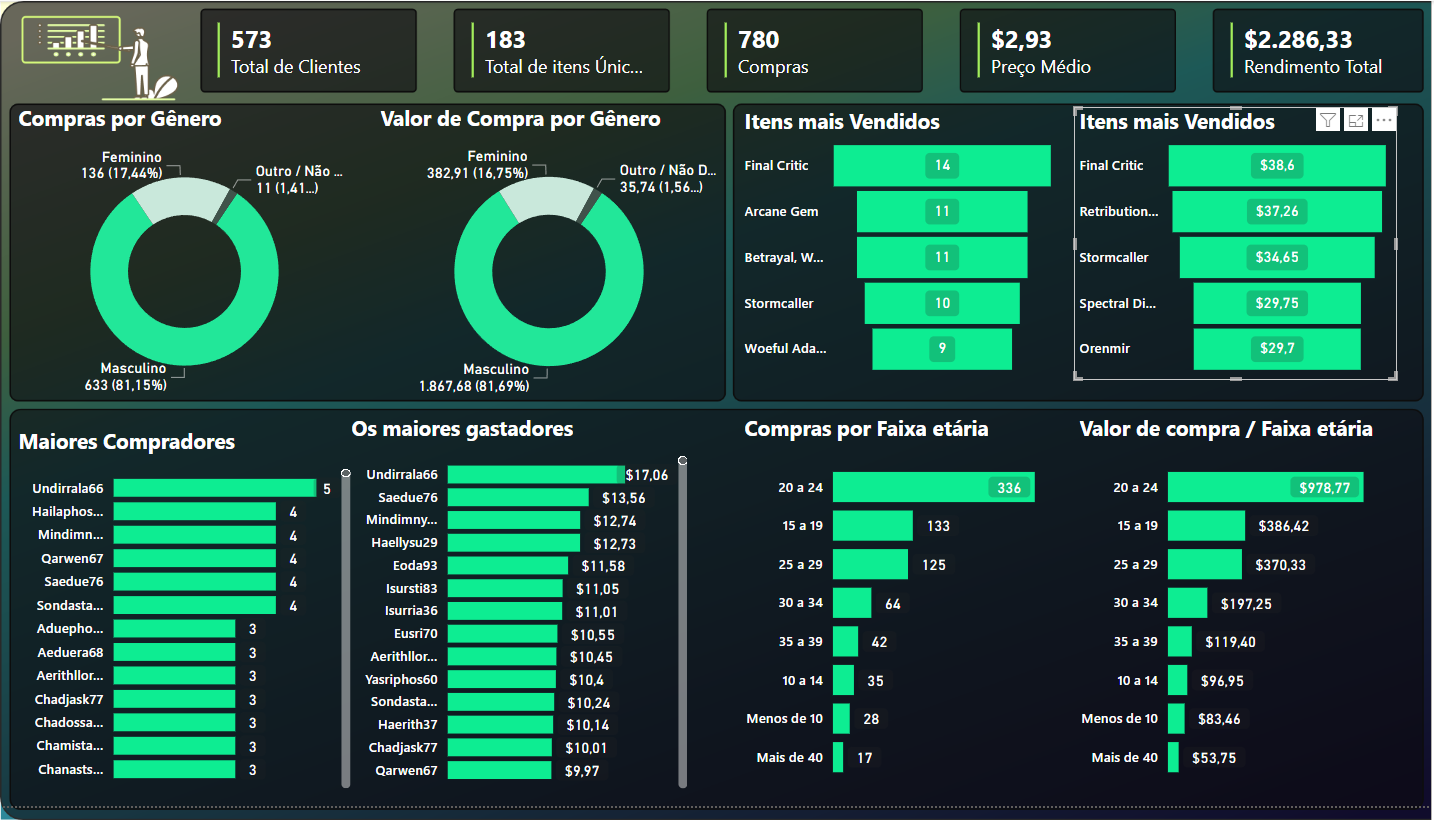
